In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

### Extension to two-dimensions: waves on a thin membrane

See Chapter 21.5-21.7

We'll follow your book's notation:

* $x$ and $y$ are the coordinates on the membrane, with indices $i$ and $j$, respectively, and $z$ is the vertical displacement of the membrane. The time index is $k$.
* The $z$ motion of a small piece of the membrane is determined by the forces acting on the edges.
   * $m=\rho \Delta x \Delta y$.
   * in the figure below, $T$ is the tension per unit length. See why?

<img src="Figures/Figure_21.6.png" width="50%">

We have, from the figure, $\sum F_z(x)  \ =\  T\Delta x \sin\theta - T \Delta x  \sin \phi$, and again asserting the small-angle approximation:

$$\sin \theta   \approx\  \tan  \theta    =  \left.\frac{\partial u}{ \partial y}\right|_{y+\Delta y},\quad \text{and}\quad
      \sin \phi   \approx\  \tan \phi
   =  \left.\frac{\partial u}{ \partial y}\right|_{y}$$

Then, for a fixed $x$ value, we can write the dependence on $y$:

$$\sum F_z (x_\text{fixed}) =  T\Delta x \left(
  \frac{\partial u}{ \partial y}\Bigr |_{y+\Delta y}-
  \frac{\partial u}{ \partial y}\Bigr |_{y} \right)
\ \approx\   T\Delta x  \frac{\partial^2 u}{\partial y^2} \Delta y$$

Similarly, variation in $x$ gives:

$$ \sum F_z (y_\text{fixed})
  \ =\  T\Delta y \left(  \left.\frac{\partial u}{ \partial x}\right|_{x+\Delta x}-
 \left.\frac{\partial u}{ \partial x}\right|_{x} \right)
   \ \approx\   T\Delta y  \frac{\partial^2 u}{\partial x^2} \Delta x$$
   
Notice $\Delta x \Delta y$ is in in both terms.

Newton’s second law:
$$\begin{align}
\rho\Delta x\Delta y \frac{\partial^2 u}{\partial t^2} & = T \Delta x  \frac{\partial^2 u}{\partial y^2}
\Delta y+ T\Delta y  \frac{\partial^2 u}{\partial x^2} \Delta x, \\
\Rightarrow\hspace{6ex} \frac{1}{ v^2} \frac{\partial ^2u}{ \partial t^2}  \ & =\
  \frac {\partial ^2 u }{ \partial x^2} +  \frac{\partial ^2 u }{ \partial y^2}
\end{align}$$

The velocity $v=\sqrt{T/\rho}$ is similar to what we had for the 1-dim string. Check the units: recall $\rho$ is mass/area and $T$ is tension per unit length.


## Numerical Solution for 2-D Wave Equation

As usual, use the finite-difference approximations:

$$\begin{align}
\frac{\partial^2 u(x,y,t)}{ \partial t^2} &\ =\  \frac{u(x,y,t+\Delta t) +
u(x,y,t-\Delta t) -2u(x,y,t) }{ (\Delta t)^2} \\
\frac{\partial^2 u(x,y,t)}{ \partial x^2} &\ =\
\frac{u(x+\Delta x,y,t) + u(x-\Delta x,y,t) -2u(x,y,t) }{ (\Delta x)^2}\\
\frac{\partial^2 u(x,y,t)}{ \partial y^2} &\ =\ \frac{u(x,y+\Delta y,t) +
u(x,y-\Delta y,t) -2u(x,y,t) }{ (\Delta y)^2}
\end{align}$$

and sub into the 2-D wave equation to obtain an explicit solution for time-stepping.

* (Reminder: your textbook's notation: the time index $k$ is in superscript, while position indices $i,j$ are in subscript.)

$$\boxed{
u^{k+1}_{i,j} =   2u^k_{i,j}-u^{k-1}_{i,j}+   \frac{v^2}{c'^2} \left[u^{k}_{i+1,j}
 +  u^{k}_{i-1,j}
    -4u^k_{i,j}
+  {u^{k}_{i,j+1} + u^{k}_{i,j-1}  } \right]}
$$

This is the equation we will put in the code to update the $z$ value for each point on the discrete grid. Note, your book is assuming $\Delta x$ and $\Delta y$ are the same size, and again $c'\equiv\frac{\Delta x}{\Delta t}$. The stability condition is now a factor two smaller (a point your book glosses over), as [it's a condition on the sum of the values in the two dimensions](https://en.wikipedia.org/wiki/Courant–Friedrichs–Lewy_condition). Feel free to experiment!

### Initial Conditions

As before, need values for the positions at $k=0$, corresponding to $t=-\Delta t$.

* If the membrane is assumed to start from rest ($\partial u/\partial t = 0$), then we can use the same trick as for the 1-D case:

$$\begin{align}
\frac{\partial u (t=0)}{\partial t} &= 0 \\
\frac{u^1_{i,j}-u^{-1}_{i,j}} { 2\Delta t} &= 0 \\
u^{-1}_{i,j} &=u^1_{i,j}
\end{align}$$

Substituting:

$$\boxed{u^1_{i,j} = u^0_{i,j}+ \frac{c^2}{ 2 c'^2} \left[u^{0}_{i+1,j}
 +  u^{0}_{i-1,j}
   -4u^0_{i,j}
+  {u^{0}_{i,j+1} + u^{0}_{i,j-1}  } \right]}$$


### Implementation 

Try these normal modes:
* $(nx, ny) = (1,1)$ mode
* (2,1) mode
   * (1,2) is just an $xy$ swap
* (2,2) mode



<IPython.core.display.Javascript object>


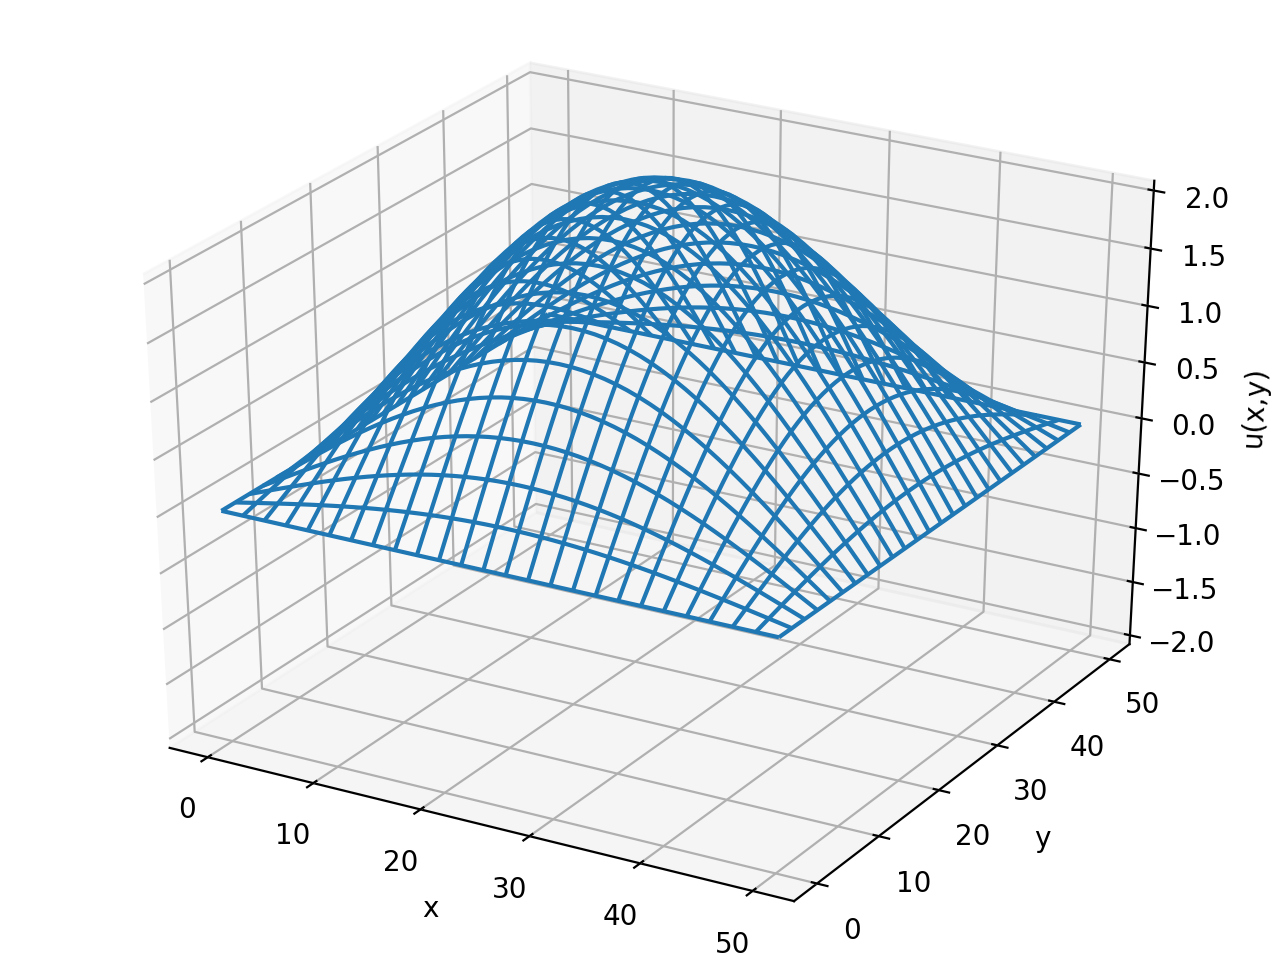

In [74]:
%matplotlib notebook
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation
    Solve Helmholtz equation for rectangular vibrating membrane
    Initial conditions: u(x,y,t=0)=0 at borders, du/dt(x,y,t=0)=0                       
    Tension (ten)= 180 N/m^2, density (den)= 390.0 kg/m^2 (rubber)"""
     
# Waves2D.py:  Solve Helmholtz equation for rectangular vibrating membrane 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
                                  
N = 51              
c = np.sqrt(180./390.)                     # Speed = sqrt(ten[]/den[kg/m2;])
u = np.zeros((N,N,N))
v = np.zeros((N,N))                       # for plotting
vinit = np.zeros((N,N))
incrx = np.pi/(N-1)
incry = np.pi/(N-1)                         
cprime = c                                                     
covercp = c/cprime
ratio = 0.5*covercp*covercp  # c/c' 0.5 for stable

y = 0.0              
for j in range(0,N):                                 # Initial position
    x = 0.0
    for i in range(0,N):
        u[i][j][0] = 3.*np.sin(1.*x)*np.sin(1.0*y)                  # Initial shape
        v[i][j] = u[i][j][0]
        x += incrx
    y += incry
    
for j in range(1,N-1):                              # First time step
    for i in range(1,N-1):
        u[i][j][1] = u[i][j][0] + 0.5*ratio*(u[i+1][j][0]+u[i-1][j][0] 
                                             + u[i][j+1][0]+u[i][j-1][0]-4.*u[i][j][0])  

x1 = range(0, N)
y1 = range(0, N)
X, Y = np.meshgrid(x1,y1)

fig = plt.figure()
ax = Axes3D(fig)
ax.set_zlim(-2.0, 2.0)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x,y)')  

def init():
    animate.wframe = ax.plot_wireframe(X, Y, v)
    return animate.wframe

def animate(i):
    ax.collections.remove(animate.wframe)
    for j in range(1,N-1): 
        for i in range(1,N-1):
            u[i][j][2] = 2.*u[i][j][1] - u[i][j][0] + ratio*(u[i+1][j][1] + 
                                                             u[i-1][j][1] +u[i][j+1][1]+u[i][j-1][1] - 4.*u[i][j][1])

# can reset the $k$ index, as we've baked in the information from $t=-\Delta t$.
    for j in range(1,N-1): 
        for i in range(1,N-1):
            u[i][j][0] = u[i][j][1]                       # Reset past  
            u[i][j][1] = u[i][j][2]                       # Reset present

    for j in range(0,N):     
        for i in range(0,N):
            v[i][j] = u[i][j][2]           # Convert to 2D for matplotlib

    animate.wframe = ax.plot_wireframe(X, Y, v)
    return animate.wframe

ani = animation.FuncAnimation(fig, animate, np.arange(1000), interval=1, blit=True, init_func=init)

Next, let's pluck at the center and see what happens: (btw, as usual, we'll want to remake the code so we can explore).


<IPython.core.display.Javascript object>


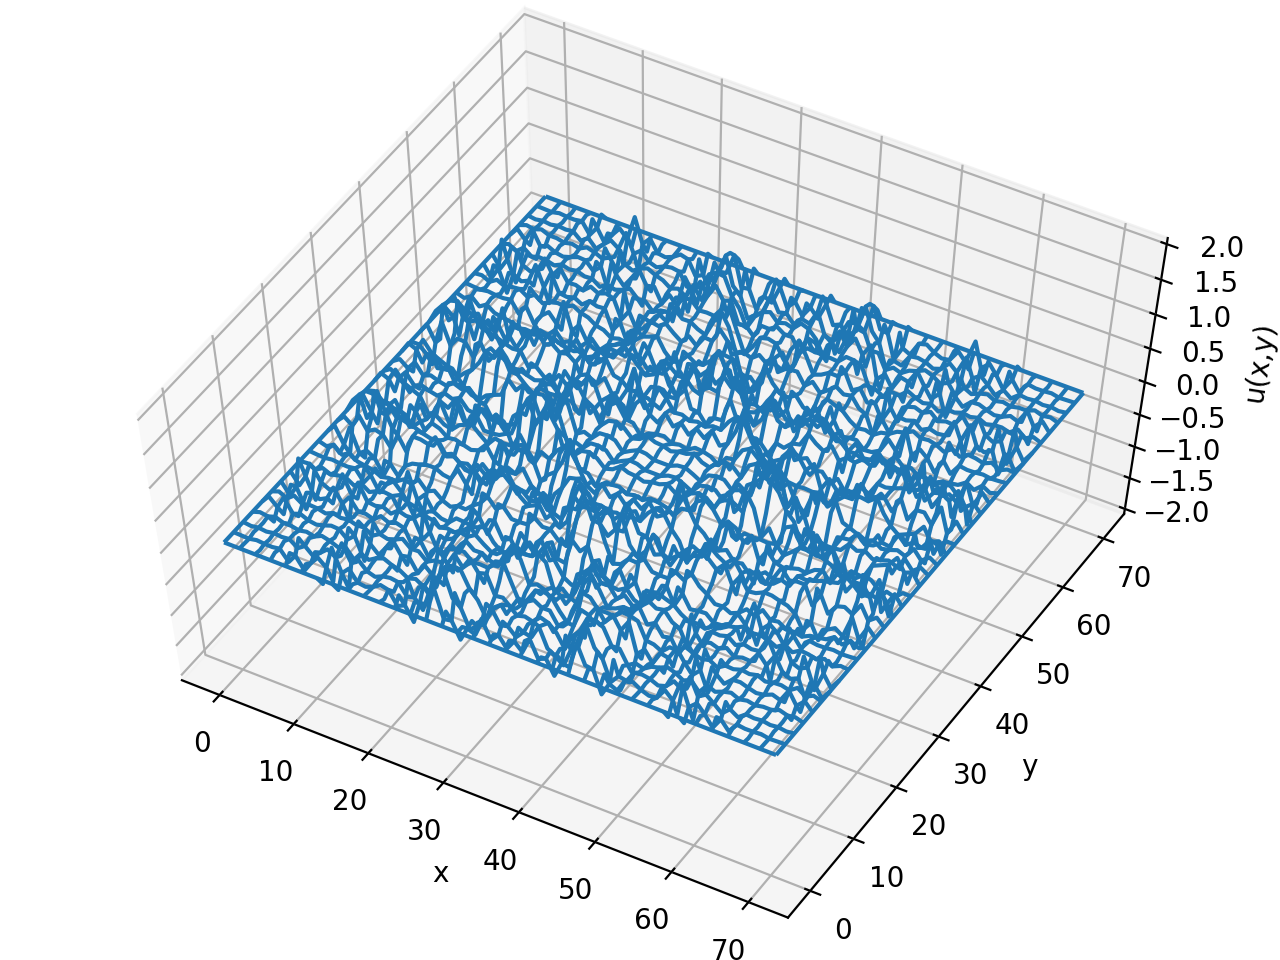

In [73]:
%matplotlib notebook
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation
    Solve Helmholtz equation for rectangular vibrating membrane
    Initial conditions: u(x,y,t=0)=0 at borders, du/dt(x,y,t=0)=0                       
    Tension (ten)= 180 N/m^2, density (den)= 390.0 kg/m^2 (rubber)"""
     
# Waves2D.py:  Solve Helmholtz equation for rectangular vibrating membrane 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
                                  
N = 71              
c = np.sqrt(180./390)                     # Speed = sqrt(ten[]/den[kg/m2;])
u = np.zeros((N,N,N))
v = np.zeros((N,N)) 
vinit = np.zeros((N,N))
incrx = np.pi/(N-1)
incry = np.pi/(N-1)                         
cprime = c                                                     
covercp = c/cprime
ratio = 0.5*covercp*covercp  # c/c' 0.5 for stable

y = 0.0              
x = 0.0
up=6.
#u[1][1][0]=up
#u[99][99][0]=up
#u[1][99][0]=up
#u[99][1][0]=up
mid=int(N/2)
u[mid-1][mid-1][0]=up
u[mid][mid-1][0]=up
u[mid+1][mid-1][0]=up
u[mid-1][mid][0]=up
#u[mid][mid][0]=up
u[mid+1][mid][0]=up
u[mid-1][mid+1][0]=up
u[mid][mid+1][0]=up
u[mid+1][mid+1][0]=up

"""for j in range(0,N):                                 # Initial position
    x = 0.0
    for i in range(0,N):
        u[i][j][0] = 3*np.sin(1.*x)*np.sin(2.0*y)                  # Initial shape
        v[i][j] = u[i][j][0]
        x += incrx
    y += incry
"""    
for j in range(1,N-1):                              # First time step
    for i in range(1,N-1):
        u[i][j][1] = u[i][j][0] + 0.5*ratio*(u[i+1][j][0]+u[i-1][j][0] 
                                             + u[i][j+1][0]+u[i][j-1][0]-4.*u[i][j][0])  

x1 = range(0, N)
y1 = range(0, N)
X, Y = np.meshgrid(x1,y1)

fig = plt.figure()
ax = Axes3D(fig,elev=60.)
ax.set_zlim(-2.0, 2.0)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x,y)')  

def init():
    animate.wframe = ax.plot_wireframe(X, Y, v)
    return animate.wframe

def animate(i):
    ax.collections.remove(animate.wframe)
    for j in range(1,N-1): 
        for i in range(1,N-1):
            u[i][j][2] = 2.*u[i][j][1] - u[i][j][0] + ratio*(u[i+1][j][1] + 
                                                             u[i-1][j][1] +u[i][j+1][1]+u[i][j-1][1] - 4.*u[i][j][1])

    for j in range(1,N-1): 
        for i in range(1,N-1):
            u[i][j][0] = u[i][j][1]                       # Reset past  
            u[i][j][1] = u[i][j][2]                       # Reset present

    for j in range(0,N):     
        for i in range(0,N):
            v[i][j] = u[i][j][2]           # Convert to 2D for matplotlib

    animate.wframe = ax.plot_wireframe(X, Y, v)
    return animate.wframe

ani = animation.FuncAnimation(fig, animate, np.arange(1000), interval=1, blit=True, init_func=init)

It would be interesting to do this problem in cylindrical coordinates with a circular boundary (a real drum head). If you are at the Exploratorium, I recommend [this exhibit](https://youtu.be/keyGCgjXjJk).

Why does the code comment reference the Helmholtz equation? Recall, the wave equation is sometimes separated into spatial and temporal parts. See the Math Methods book by Boas or [here](https://en.wikipedia.org/wiki/Helmholtz_equation).

----
----
Also, you might be interested in the discussion of solitons, chapter 24.

Take some time to play with these. 

----- 
-----

Now, let's discuss

## Project Proposal Peer Reviews

* The goal is to enhance learning for both you and your assigned peer.

* It is very important that this be conducted in a manner that is respectful, professional, and supportive. Please remember that something you find funny or harmless could be received very differently.

* You are not grading, you are reviewing. We'll discuss the differences.

* Read the proposal carefully at least twice.

* In forming your evaluation, think about what kinds of feedback you would find helpful.


Qustions to answer:

1. Are each of the seven rubric points addressed clearly and completely? Please provide your brief answers for each of the seven points. What are some strengths to highlight? What areas could use additional attention or clarity?

2. Is the project feasible in the time allotted? Are there potential changes in scope, or a change in work plan, that could improve the outcome? Is the time for each step realistic?

3. Any additional suggestions you have to offer? 
